# CRISP-DM 

This notebook follows the **CRISP-DM (Cross Industry Standard Process for Data Mining)** methodology:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

The project aims to build a Quadrant Stock Classification System using **deep learning models**.


## Business Understanding

a. Complex and scattered financial data make stock analysis difficult and time-consuming.

b. Lack of systematic tools to classify and prioritize stocks effectively.

c. Manual analysis leads to slow decisions and reduced investment accuracy.

## Data Understanding

ดึงชื่อหุ้นของประเทศไทย

[coding name stock](https://github.com/phqsuema123/Stock-quadrant-quantitative-analysis-using-deep-learning-classification/blob/main/1.Final_file/1.Pull_the_name_of_Thai_stocks/name_stock.ipynb)

ดึงข้อมูลจากAPI Settrade API 

ข้อมูลพื้นฐานของหุ้นดึงมาจาก https://developer.settrade.com/open-api/api-reference/reference/sdkv2/python/market-data/getQuoteSymbol

[coding fundematal](https://github.com/phqsuema123/Stock-quadrant-quantitative-analysis-using-deep-learning-classification/blob/main/1.Final_file/2.Data_collection/data_finan_setAPI.ipynb)

ข้อมูลของTechnical Data.

 https://developer.settrade.com/open-api/api-reference/reference/sdkv2/python/market-historical-data/2_getCandlestick 
 
 โดยดึงล่าสุดวันที่1 เดือน10 ปี68  เลือกเดือน June เพราะอยู่ช่วงปลาย Q2 และกำลังจะเข้าสู่ Q3 คำว่า “Quarter” (ไตรมาส) ในบริบทธุรกิจและการเงิน หมายถึงการแบ่งปีออกเป็น 4 ช่วง (Quarter 1–Quarter 4) เพื่อใช้ในการรายงานผลประกอบการทางการเงินหรือวิเคราะห์แนวโน้มเศรษฐกิจ

[Technical Data](https://github.com/phqsuema123/Stock-quadrant-quantitative-analysis-using-deep-learning-classification/blob/main/1.Final_file/2.Data_collection/Technical_data.ipynb)

โหลดข้อมูลเข้าฐานข้อมูลcassandra เเละ โหลดข้อมูลที่ใช้ลงexcel 

ข้อมูลของพื้นฐานของหุ้น เอาคอลัมท์ symbol,eps,pe,pbv,percentYield 

เเละข้อมูลของเทคนิค ดึงตั่งเเต่วันที่1 เดือนjune 2025 (2025-06-01)

[coding save to excel](https://github.com/phqsuema123/Stock-quadrant-quantitative-analysis-using-deep-learning-classification/blob/main/1.Final_file/2.Data_collection/savetoexcel.ipynb)

In [42]:
import pandas as pd
import numpy as np

In [43]:
df_fun=pd.read_excel("C:/Users/Admin/OneDrive/Desktop/Stock-quadrant-quantitative-analysis-using-deep-learning-classification/1.Final_file/2.Data_collection/stock_fun.xlsx")

In [44]:
df_tn=pd.read_excel("C:/Users/Admin/OneDrive/Desktop/Stock-quadrant-quantitative-analysis-using-deep-learning-classification/1.Final_file/2.Data_collection/stock_june2025_onwards.xlsx")

## Data Preparation

สำรวจข้อมูลแท่ง บรรทัด คอลัมท์ ข้อมูลmissing(NAN) ข้อมูลสรุปสถิติ 

In [45]:
print(df_tn.shape)
print(df_tn.isnull().sum())
print(df_tn.describe())

(69362, 8)
symbol         0
time           0
close_price    0
high_price     0
low_price      0
open_price     0
value          0
volume         0
dtype: int64
                                time   close_price    high_price  \
count                          69362  69362.000000  69362.000000   
mean   2025-08-01 21:57:51.906807552      9.963896     10.069459   
min              2025-06-04 00:00:00      0.010000      0.010000   
25%              2025-07-02 00:00:00      0.900000      0.910000   
50%              2025-08-01 00:00:00      2.680000      2.720000   
75%              2025-09-02 00:00:00      7.158460      7.250000   
max              2025-10-01 00:00:00    350.000000    360.000000   
std                              NaN     29.165057     29.381371   

          low_price    open_price          value        volume  
count  69362.000000  69362.000000   69362.000000  6.936200e+04  
mean       9.858781      9.962452       7.314754  5.693653e+06  
min        0.010000      0.01000

สำรวจข้อมูลพท้นฐาน บรรทัด คอลัมท์ ข้อมูลmissing(NAN) ข้อมูลสรุปสถิติ 

In [46]:
print(df_fun.shape)
print(df_fun.isnull().sum())
print(df_fun.describe())

(907, 7)
symbol           0
eps             64
pe              71
pbv              8
percentyield     7
volume           0
marketcap        0
dtype: int64
              eps            pe         pbv  percentyield        volume  \
count  843.000000    836.000000  899.000000    900.000000  9.070000e+02   
mean     0.416486     29.970897    1.181869      3.909367  4.594697e+06   
std      2.098391    455.065368    1.845644      3.944323  1.986407e+07   
min    -11.024490      0.000000    0.000000      0.000000  1.000000e+02   
25%     -0.008735      0.000000    0.490000      0.000000  4.120000e+04   
50%      0.070000      9.325000    0.770000      3.280000  3.178100e+05   
75%      0.277725     15.457500    1.280000      6.492500  2.076406e+06   
max     36.741980  13142.170000   33.130000     24.910000  4.516564e+08   

          marketcap  
count  9.070000e+02  
mean   4.609440e+07  
std    2.740798e+08  
min    1.800000e+02  
25%    8.427056e+04  
50%    5.555000e+05  
75%    4.324607

ดรอปข้อมูล NAN

In [47]:
df_fun.dropna(inplace=True)

In [48]:
print(df_fun.isnull().sum())
print(df_fun.shape)

symbol          0
eps             0
pe              0
pbv             0
percentyield    0
volume          0
marketcap       0
dtype: int64
(836, 7)


data vizulation

เส้นค่าเฉลี่ยเคลื่อนที่แบบเอ็กซ์โพเนนเชียล (Exponential Moving Average - EMA)

คือเส้นค่าเฉลี่ยของราคาหุ้นย้อนหลังในระยะเวลาต่างๆ กัน (5, 15, 35, 89, และ 200 วัน) โดยให้ความสำคัญกับราคาล่าสุดมากกว่า เส้นเหล่านี้ช่วยบอกถึงแนวโน้มในระยะสั้นไปจนถึงระยะยาว

🔵 EMA5 = ระยะสั้น, สัญญาณไว

🟠 EMA15 = ระยะกลาง, ช่วยกรองสัญญาณ

🟢 EMA35 = แนวโน้มกลาง

🟣 EMA89 = แนวโน้มหลัก

🔴 EMA200 = แนวโน้มระยะยาว (เส้นใหญ่สุด)

โดยทั่วไปจำนวน “5, 15, 35, 89, 200” ของ EMA มักอิงกับจำนวน “วันทำการซื้อขาย (trading days)”
ซึ่งหมายถึง **วันทำงานของตลาดหุ้น (วันราชการที่ตลาดเปิด)**  ไม่รวมเสาร์–อาทิตย์ หรือวันหยุดนักขัตฤกษ์ของตลาดหลักทรัพย์

---

### 💡 อธิบายอย่างละเอียด

| ค่า EMA    | ช่วงเวลาโดยประมาณ | อิงจาก       | ใช้เพื่อวิเคราะห์อะไร                                    |
| ---------- | ----------------- | ------------ | -------------------------------------------------------- |
| **EMA5**   | ~1 สัปดาห์        | 5 วันทำการ   | แนวโน้มระยะสั้นมาก (daily momentum)                      |
| **EMA15**  | ~3 สัปดาห์        | 15 วันทำการ  | แนวโน้มระยะสั้น                                          |
| **EMA35**  | ~7 สัปดาห์        | 35 วันทำการ  | แนวโน้มระยะกลาง                                          |
| **EMA89**  | ~4 เดือน          | 89 วันทำการ  | แนวโน้มระยะกลางถึงยาว                                    |
| **EMA200** | ~10 เดือน         | 200 วันทำการ | แนวโน้มระยะยาว (ใช้บ่อยในตลาดโลก เช่น S&P500, SET Index) |

---

### 📆 ตัวอย่างการแปลงเป็น “ระยะเวลาในปฏิทินจริง”

โดยทั่วไปตลาดหุ้นไทย (SET) เปิดทำการประมาณ **21–22 วันต่อเดือน**
ดังนั้นเราจะได้โดยประมาณว่า:

| ค่า    | คิดเป็นวันทำการ | เทียบเป็น “ระยะเวลาในปฏิทิน” |
| ------ | --------------- | ---------------------------- |
| EMA5   | 1 สัปดาห์       | 1 สัปดาห์                    |
| EMA15  | 3 สัปดาห์       | ~3 สัปดาห์                   |
| EMA35  | 7 สัปดาห์       | ~1.5 เดือน                   |
| EMA89  | 4 เดือน         | ~4 เดือน                     |
| EMA200 | 10 เดือน        | ~10 เดือน – 1 ปี             |

---

### 🔍 สรุปสั้น ๆ

> ค่าของ **EMA 5, 15, 35, 89, 200** มาจาก “จำนวนวันทำการของตลาดหุ้น” (Trading Days)
> ซึ่งถือเป็น “วันราชการที่ตลาดหลักทรัพย์เปิด”
> และถูกเลือกเพื่อให้ครอบคลุมแนวโน้มหลายระดับ — จากสั้นที่สุด (EMA5) ถึงยาวที่สุด (EMA200)

In [49]:
import plotly.graph_objects as go

# 🔹 เลือกเฉพาะหุ้น 24CS
ohlc_df = df_tn[df_tn["symbol"] == "SQ"].copy()

# 🔹 จัดการ index
ohlc_df["time"] = pd.to_datetime(ohlc_df["time"])
ohlc_df = ohlc_df.sort_values("time")
ohlc_df = ohlc_df.set_index("time")
ohlc_df.index.name = "Date"

# 🔹 Rename columns ให้ตรงกับ Plotly
ohlc_df = ohlc_df.rename(columns={
    "open_price": "Open",
    "high_price": "High",
    "low_price": "Low",
    "close_price": "Close",
    "volume": "Volume"
})

# 🔹 เลือกแค่ 200 วันล่าสุด (เพื่อดูง่าย)
ohlc_df = ohlc_df.tail(200)

# 🔹 คำนวณ EMA
for p in [5, 15, 35, 89, 200]:
    ohlc_df[f"EMA{p}"] = ohlc_df["Close"].ewm(span=p, adjust=False).mean()

# ✅ กราฟ Candlestick
fig = go.Figure(data=[go.Candlestick(
    x=ohlc_df.index,
    open=ohlc_df['Open'],
    high=ohlc_df['High'],
    low=ohlc_df['Low'],
    close=ohlc_df['Close'],
    name="Candlestick"
)])

# ✅ เส้น EMA
colors = {5:"blue", 15:"orange", 35:"green", 89:"purple", 200:"red"}
for p in [5, 15, 35, 89, 200]:
    fig.add_trace(go.Scatter(
        x=ohlc_df.index,
        y=ohlc_df[f"EMA{p}"],
        mode="lines",
        line=dict(width=2, color=colors[p]),
        name=f"EMA{p}"
    ))

# ✅ Volume
fig.add_trace(go.Bar(
    x=ohlc_df.index,
    y=ohlc_df['Volume'],
    name="Volume",
    marker_color="lightblue",
    opacity=0.5,
    yaxis="y2"
))

# ✅ Layout
fig.update_layout(
    title="DELTA Stock Candlestick Chart with EMA(5,15,35,89,200) and Volume",
    yaxis=dict(title="Price", domain=[0.3, 1]),
    yaxis2=dict(title="Volume", domain=[0, 0.25]),
    xaxis=dict(title="Date"),
    xaxis_rangeslider_visible=False,
    template="plotly_white",
    width=950,
    height=600
)

fig.show()

### Technical Data Grouping

We categorize stock market technical signals using **Exponential Moving Averages (EMA)** and **Relative Strength Index (RSI)**.

* **a: Strong Momentum / Overbought**

  * Condition: `Close ≥ EMA5` **and** `RSI ≥ 70`
  * Interpretation: The stock is in an **overbought zone** with very strong upward momentum.

* **b: Clear Uptrend**

  * Condition: `Close ≥ EMA35` **and** `EMA35 ≥ EMA89`
  * Interpretation: The stock is trending upward, showing medium-term bullish strength.

* **c: Sideways above EMA89**

  * Condition: `Close ≥ EMA89` **and** short-term EMAs (5/15/35/89) are close together:

    $$
    \frac{\max(EMA) - \min(EMA)}{\text{mean}(EMA)} \leq band\_pct \quad (default = 1.5\%)
    $$
  * Interpretation: The stock is moving **sideways** but remains above the long-term EMA89, indicating consolidation.

* **d: Downtrend**

  * Condition: `Close < EMA89` **and** `Close < EMA200` **and** `EMA89 < EMA200`
  * Interpretation: The stock is in a **bearish trend**, moving below key long-term averages.

* **e: Crash**

  * Condition: Strong descending order → `Close < EMA5 < EMA15 < EMA35 < EMA89 < EMA200` **and** `RSI ≤ 30`
  * Interpretation: The stock is in a **sharp decline (crash)** with strong bearish momentum and oversold conditions.

---

In [50]:
import pandas as pd
import numpy as np
import ta

def compute_technical_grades(df_candle, band_pct=0.015):
    df_result = []

    for symbol, df_sym in df_candle.groupby('symbol'):
        df_sym = df_sym.sort_values('time').copy()
        df_sym = df_sym.dropna(subset=['close_price'])

        if len(df_sym) < 50:
            continue

        # ✅ คำนวณ EMA และ RSI
        df_sym['ema5']   = df_sym['close_price'].ewm(span=5).mean()
        df_sym['ema15']  = df_sym['close_price'].ewm(span=15).mean()
        df_sym['ema35']  = df_sym['close_price'].ewm(span=35).mean()
        df_sym['ema89']  = df_sym['close_price'].ewm(span=89).mean()
        df_sym['ema200'] = df_sym['close_price'].ewm(span=200).mean()
        df_sym['rsi']    = ta.momentum.RSIIndicator(close=df_sym['close_price'], window=14).rsi()

        df_sym = df_sym.dropna(subset=['ema5','ema15','ema35','ema89','ema200','rsi'])
        if df_sym.empty:
            continue

        # ✅ ใช้ข้อมูลล่าสุด
        row = df_sym.iloc[-1]
        c, r = row['close_price'], row['rsi']
        e5, e15, e35, e89, e200 = row['ema5'], row['ema15'], row['ema35'], row['ema89'], row['ema200']

        # ✅ Logic grading
        if c >= e5 and r >= 70:
            grade = 'a'
        elif c >= e35 and e35 >= e89:
            grade = 'b'
        elif c >= e89 and (max([e5,e15,e35,e89]) - min([e5,e15,e35,e89])) / np.mean([e5,e15,e35,e89]) <= band_pct:
            grade = 'c'
        elif c < e89 and c < e200 and e89 < e200:
            grade = 'd'
        elif c < e5 < e15 < e35 < e89 < e200 and r <= 30:
            grade = 'e'
        else:
            grade = 'c'

        # ✅ บันทึกค่าทั้งหมด รวม EMA และ RSI
        df_result.append({
            'symbol': symbol,
            'time': row['time'],
            'close_price': row['close_price'],
            'high_price': row['high_price'],
            'low_price': row['low_price'],
            'open_price': row['open_price'],
            'value': row['value'],
            'ema5': e5,
            'ema15': e15,
            'ema35': e35,
            'ema89': e89,
            'ema200': e200,
            'rsi': r,
            'trend_grade': grade
        })

    return pd.DataFrame(df_result)


In [51]:
df_result = compute_technical_grades(df_tn) 

### ✅ **1. EMA (Exponential Moving Average)**

> ใช้เพื่อบ่งบอกแนวโน้ม (trend) ของราคาหุ้นในช่วงเวลาต่าง ๆ

| ค่า        | สูตร / ความหมาย                              | ใช้สำหรับ                                    |
| ---------- | -------------------------------------------- | -------------------------------------------- |
| **ema5**   | ค่าเฉลี่ยเคลื่อนที่แบบเอ็กซ์โปเนนเชียล 5 วัน | แนวโน้มระยะสั้นมาก                           |
| **ema15**  | ค่าเฉลี่ยเคลื่อนที่ 15 วัน                   | แนวโน้มระยะสั้น                              |
| **ema35**  | ค่าเฉลี่ยเคลื่อนที่ 35 วัน                   | แนวโน้มระยะกลาง                              |
| **ema89**  | ค่าเฉลี่ยเคลื่อนที่ 89 วัน                   | แนวโน้มระยะยาว                               |
| **ema200** | ค่าเฉลี่ยเคลื่อนที่ 200 วัน                  | แนวโน้มระยะยาวมาก (บ่งบอกแนวโน้มหลักของตลาด) |

**สูตรทั่วไปของ EMA:**
[
EMA_t = (P_t \times k) + (EMA_{t-1} \times (1 - k))
]
โดยที่

* ( P_t ) = ราคาปิดของวันปัจจุบัน
* ( k = \frac{2}{N+1} ), เมื่อ ( N ) คือจำนวนวันที่ใช้คำนวณ (เช่น 5, 15, 35, 89, 200)
* ใช้ข้อมูลราคาปิด (`close_price`) จาก API หรือฐานข้อมูล Cassandra

**ใน Python:**

```python
import pandas as pd

df['ema5'] = df['close_price'].ewm(span=5, adjust=False).mean()
df['ema15'] = df['close_price'].ewm(span=15, adjust=False).mean()
df['ema35'] = df['close_price'].ewm(span=35, adjust=False).mean()
df['ema89'] = df['close_price'].ewm(span=89, adjust=False).mean()
df['ema200'] = df['close_price'].ewm(span=200, adjust=False).mean()
```

---

### ✅ **2. RSI (Relative Strength Index)**

> ใช้เพื่อวัด “แรงซื้อ–แรงขาย” และระดับ Overbought / Oversold

**สูตรทั่วไปของ RSI:**
[
RSI = 100 - \frac{100}{1 + RS}
]
โดยที่
[
RS = \frac{\text{ค่าเฉลี่ยกำไร (Average Gain)}}{\text{ค่าเฉลี่ยขาดทุน (Average Loss)}}
]
มักใช้คำนวณในช่วง **14 วัน (RSI14)**

**ใน Python:**

```python
import pandas as pd

delta = df['close_price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()

rs = gain / loss
df['rsi'] = 100 - (100 / (1 + rs))
```

---

### ✅ **3. แหล่งข้อมูลต้นทาง**

จากรายงานโครงงานของคุณระบุว่า

> “The stock data for analysis is retrieved from **SETTRADE Open API** and stored in a PostgreSQL database. Technical Data includes close, high, low, open, value, volume...”

ดังนั้นค่าพวกนี้ถูกคำนวณจาก **ราคาปิดของหุ้นแต่ละตัวในแต่ละวัน** ที่ได้จาก API (หรือจากตาราง Cassandra เช่น `candlestick_data`) แล้วสร้างเป็นฟีเจอร์ใหม่ในขั้นตอน Feature Engineering ก่อนนำเข้าโมเดล Deep Learning

---

สรุปสั้น ๆ:

| Indicator     | ที่มาจาก                 | ใช้บอกอะไร                |
| ------------- | ------------------------ | ------------------------- |
| `ema5–ema200` | ราคาปิด (`close_price`)  | แนวโน้มของราคา (trend)    |
| `rsi`         | การเปลี่ยนแปลงของราคาปิด | แรงซื้อ–แรงขาย (momentum) |

In [52]:
df_result.head(10)

,symbol,time,close_price,high_price,low_price,open_price,value,ema5,ema15,ema35,ema89,ema200,rsi,trend_grade
0,24CS,2025-10-01,1.14,1.14,1.13,1.13,43498,1.394893,1.408289,1.357985,1.326928,1.317656,37.621724,c
1,2S,2025-09-30,2.62,2.66,2.62,2.66,0,2.668552,2.702923,2.667533,2.578062,2.527286,41.847623,c
2,3BBIF,2025-09-30,6.50,6.60,6.45,6.60,0,6.525378,6.517466,6.424244,6.290236,6.223712,52.051964,b
3,A,2025-09-30,4.84,4.86,4.84,4.86,0,4.843595,4.842305,4.842802,4.846905,4.849548,49.416702,d
4,A5,2025-10-01,1.87,1.87,1.87,1.87,187,1.883256,1.881561,1.880982,1.896469,1.910181,46.558915,d
5,AAI,2025-09-30,4.90,5.00,4.90,4.90,0,4.927358,4.929880,4.864235,4.732070,4.658863,50.403746,b
6,AAV,2025-09-30,1.27,1.29,1.25,1.28,0,1.278322,1.296927,1.290124,1.262610,1.245126,45.279678,c
7,ABM,2025-09-30,0.81,0.85,0.81,0.84,0,0.838448,0.829629,0.782279,0.722080,0.693195,51.614097,b
8,ACC,2025-09-30,0.53,0.56,0.52,0.53,0,0.509517,0.461628,0.410535,0.369044,0.352834,66.139845,b
9,ACE,2025-09-30,1.31,1.31,1.29,1.30,0,1.301751,1.299684,1.299543,1.299531,1.299557,54.691942,b


### 📊 **ชื่อกราฟ:** Trend Grade

**แกน X:**
→ คือระดับแนวโน้ม (Trend Grade) ที่แบ่งเป็นตัวอักษร **a, b, c, d**

**แกน Y:**
→ คือจำนวนหุ้น (`count of symbol`) ที่อยู่ในแต่ละระดับแนวโน้ม

---

### 🔠 **ความหมายของแต่ละเกรด (ตามระบบ Quadrant Trend Classification)**

|  เกรด | ความหมายทั่วไป   | ลักษณะของแนวโน้ม                            | การตีความเชิงลงทุน                                                |
| :---: | :--------------- | :------------------------------------------ | :---------------------------------------------------------------- |
| **a** | ขาขึ้นแรงมาก     | EMA ระยะสั้น > ระยะยาว อย่างชัดเจน, RSI สูง | หุ้นอยู่ในแนวโน้มขาขึ้นชัดเจน เหมาะกับการ “ถือหรือซื้อเพิ่ม”      |
| **b** | ขาขึ้น           | EMA สั้นอยู่เหนือ EMA ยาว, RSI เริ่มสูงขึ้น | แนวโน้มดี มีโอกาสเติบโตต่อ เหมาะกับการ “เข้าซื้อระยะกลาง”         |
| **c** | ทรงตัว / Sideway | EMA ตัดกันหรือใกล้กัน                       | หุ้นพักตัวหรือเคลื่อนไหวในกรอบ ยังไม่ชัดเจน                       |
| **d** | ขาลง             | EMA สั้นอยู่ต่ำกว่า EMA ยาว                 | หุ้นเริ่มอ่อนแรงหรือปรับฐาน เหมาะกับ “รอดูท่าที” หรือ “ขายทำกำไร” |

---

### 📈 **จากกราฟ:**

|  เกรด | จำนวนหุ้น | สัดส่วนโดยประมาณ | การตีความภาพรวมตลาด                      |
| :---: | :-------- | :--------------- | :--------------------------------------- |
| **b** | 373       | ≈ 46%            | หุ้นส่วนใหญ่ยังอยู่ในแนวโน้ม “ขาขึ้น”    |
| **c** | 253       | ≈ 31%            | หุ้นจำนวนมากอยู่ในภาวะ “ทรงตัว”          |
| **d** | 205       | ≈ 20%            | หุ้นบางส่วนเริ่ม “อ่อนแรง”               |
| **a** | 25        | ≈ 3%             | มีเพียงไม่กี่ตัวที่อยู่ใน “ขาขึ้นแรงมาก” |

---

### 🧠 **สรุปความหมายเชิงวิเคราะห์**

* ตลาดโดยรวม **มีแนวโน้มเชิงบวก (bullish bias)**
  เพราะหุ้นส่วนใหญ่ (~46%) อยู่ในเกรด **b** ซึ่งบ่งชี้ถึง “แนวโน้มขาขึ้นปกติ”
* มีเพียงส่วนน้อย (~3%) ที่เป็นเกรด **a** ซึ่งหมายถึง “ขาขึ้นแรง” — มักเกิดในหุ้นที่มี momentum สูง
* หุ้นกลุ่ม **c และ d** รวมกัน (~51%) บ่งบอกว่าตลาดมีส่วนที่ “เริ่มชะลอ” หรือ “พักฐาน”
  ซึ่งสอดคล้องกับภาวะตลาดที่กำลังรอปัจจัยใหม่ (เช่น ข่าวเศรษฐกิจ หรือผลประกอบการ)

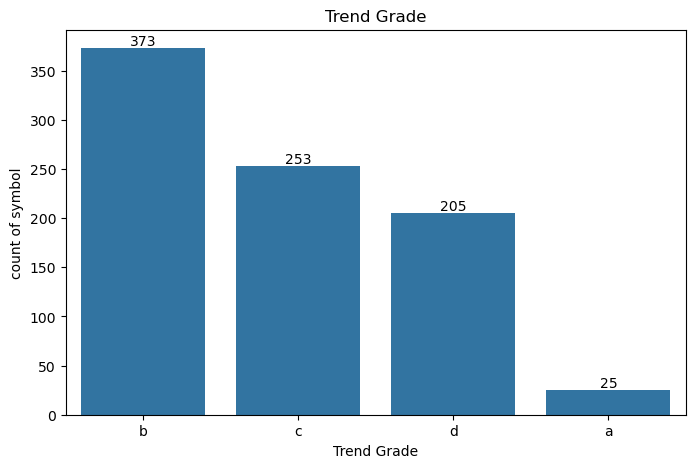

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_result, x="trend_grade", order=df_result["trend_grade"].value_counts().index)

plt.title("Trend Grade")
plt.xlabel("Trend Grade")
plt.ylabel("count of symbol")

# ✅ ใส่ตัวเลขบนแท่ง
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10
    )

plt.show()

# 📊 การแบ่งกลุ่มหุ้นตามปัจจัยพื้นฐาน (Fundamental Group)

การจัดกลุ่มหุ้นด้วยปัจจัยพื้นฐาน (Fundamental) ใช้ตัวชี้วัดทางการเงินหลัก 5 ตัว ได้แก่:

* **EPS (Earnings Per Share)** → กำไรต่อหุ้น ยิ่งสูงยิ่งดี
* **PE (Price-to-Earnings Ratio)** → ราคาหุ้นเทียบกับกำไร ยิ่งต่ำยิ่งดี
* **PBV (Price-to-Book Value Ratio)** → ราคาหุ้นเทียบกับมูลค่าทางบัญชี แสดงระดับการประเมินมูลค่า
* **Percent Yield (Dividend Yield)** → อัตราผลตอบแทนจากเงินปันผล (%) ยิ่งสูงยิ่งดี
* **Market Cap (Market Capitalization)** → มูลค่าตลาด ยิ่งสูงยิ่งมั่นคง

---

## 🔎 ขั้นตอนการคำนวณ

1. **เลือกข้อมูลพื้นฐาน (Features)**
   นำค่า `eps, pe, pbv, percentyield, marketcap` ของหุ้นแต่ละตัวมาใช้

2. **ทำการ Standardization (Z-score Normalization)**
   แปลงค่าแต่ละ feature ให้อยู่ในสเกลเดียวกัน (ค่าเฉลี่ย = 0, ส่วนเบี่ยงเบนมาตรฐาน = 1) เพื่อไม่ให้ค่าที่มีขนาดใหญ่ เช่น Market Cap ไปครอบงำค่าคะแนนรวม

3. **สร้างคะแนนรวม (Score)**
   รวมค่าที่ผ่านการปรับสเกลแล้วเป็นคะแนนเดียว

   * `+ EPS` → EPS สูง ดี
   * `- PE` → PE ต่ำ ดี
   * `+ PBV` → PBV สูง (สะท้อนการเติบโต)
   * `+ Dividend Yield` → ปันผลสูง ดี
   * `+ Market Cap` → บริษัทใหญ่มั่นคง

   สูตรคะแนนรวม:

   ```
   Score = (EPS_scaled) - (PE_scaled) + (PBV_scaled) + (Yield_scaled) + (MarketCap_scaled)
   ```

4. **แบ่งออกเป็น 5 กลุ่มด้วย Quantile (qcut)**

   * A = Top 20% (พื้นฐานแข็งแกร่งที่สุด)
   * B = 20–40% (พื้นฐานดี)
   * C = 40–60% (พื้นฐานปานกลาง)
   * D = 60–80% (พื้นฐานอ่อน)
   * E = Bottom 20% (พื้นฐานอ่อนที่สุด)

---

## 🏷 การตีความ

* **A** → หุ้นที่มีปัจจัยพื้นฐานดีที่สุด เหมาะกับการลงทุนระยะยาว
* **B** → หุ้นพื้นฐานดี มีศักยภาพในการเติบโต
* **C** → หุ้นพื้นฐานปานกลาง ความเสี่ยง/โอกาสสมดุล
* **D** → หุ้นพื้นฐานอ่อน เสี่ยงสูงขึ้น
* **E** → หุ้นพื้นฐานอ่อนที่สุด ควรหลีกเลี่ยง


### 🔍 ความหมายของ Z-score Normalization

Z-score Normalization หรือที่เรียกว่า **Standardization** คือการแปลงค่าของแต่ละตัวแปรให้มี

* ค่าเฉลี่ย (mean) = **0**
* ส่วนเบี่ยงเบนมาตรฐาน (standard deviation) = **1**

สูตรที่ใช้คือ
[
Z = \frac{X - \mu}{\sigma}
]
โดยที่

* ( X ) = ค่าจริงของข้อมูล
* ( \mu ) = ค่าเฉลี่ยของข้อมูลในคอลัมน์นั้น
* ( \sigma ) = ส่วนเบี่ยงเบนมาตรฐานของคอลัมน์นั้น

---

### 🎯 จุดประสงค์

* เพื่อให้ทุก feature อยู่ในสเกลเดียวกัน เช่น EPS, P/E, RSI อาจมีค่าคนละระดับ
* ป้องกันไม่ให้ค่าที่มีขนาดใหญ่มีอิทธิพลต่อการเรียนรู้ของโมเดลมากเกินไป
* ช่วยให้การคำนวณระยะทาง (ในโมเดล KNN, K-Means) และการปรับน้ำหนักใน Neural Network มีเสถียรภาพ

---

### 📊 สรุป

| ขั้นตอน    | รายละเอียด                                          |
| ---------- | --------------------------------------------------- |
| ชื่อเทคนิค | Z-score Normalization (Standardization)             |
| สูตร       | ( Z = (X - \mu)/\sigma )                            |
| ผลลัพธ์    | ค่าเฉลี่ย = 0, ส่วนเบี่ยงเบนมาตรฐาน = 1             |
| ประโยชน์   | ลดความแตกต่างของสเกลข้อมูล เพิ่มประสิทธิภาพของโมเดล |



In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --------------------------
# 1. เลือก Features
# --------------------------
features = ["eps", "pe", "pbv", "percentyield", "marketcap"]

# --------------------------
# 2. Standardization (Z-score)
# --------------------------
scaler = StandardScaler()
scaled = scaler.fit_transform(df_fun[features])

df_scaled = pd.DataFrame(scaled, columns=[f + "_scaled" for f in features], index=df_fun.index)

# --------------------------
# 3. สร้างคะแนนรวม (Score)
# --------------------------
df_fun["score"] = (
    df_scaled["eps_scaled"]        # + EPS
    - df_scaled["pe_scaled"]       # - PE
    + df_scaled["pbv_scaled"]      # + PBV
    + df_scaled["percentyield_scaled"]  # + Yield
    + df_scaled["marketcap_scaled"]     # + Market Cap
)

# --------------------------
# 4. แบ่งออกเป็น 5 กลุ่ม (Quantile)
# --------------------------
df_fun["fundamental_group"] = pd.qcut(
    df_fun["score"], 
    q=5, 
    labels=["E", "D", "C", "B", "A"]  # E = อ่อนสุด → A = แข็งสุด
)

In [55]:
# ✅ ดูผลลัพธ์
df_fun[['symbol','eps','pe','pbv','percentyield','marketcap','fundamental_group']].head()

,symbol,eps,pe,pbv,percentyield,marketcap,fundamental_group
0,PPPM,0.02000,0.00,0.70,0.00,105500.001572,D
1,TPCH,0.24112,7.90,0.34,13.91,401575.987864,A
3,POLY,0.27632,12.89,2.42,6.38,152320.004272,A
5,VCOM,0.21428,7.85,1.48,10.79,303722.809988,A
6,KDH,4.12186,10.62,1.93,3.01,348900.750000,A


### 📘 **ชื่อกราฟ:** Fundamental Group Distribution

**แกน X:**
→ หมายถึง **กลุ่มพื้นฐาน (Fundamental Group)** ที่แบ่งเป็นระดับ **A, B, C, D, E**

**แกน Y:**
→ หมายถึง **จำนวนหุ้น (count)** ที่อยู่ในแต่ละกลุ่ม

---

### 🔠 **ความหมายของแต่ละกลุ่ม (Fundamental Grade A–E)**

| กลุ่ม | ความหมาย        | ลักษณะทางการเงินของบริษัท              | การตีความเชิงลงทุน        |
| :---: | :-------------- | :------------------------------------- | :------------------------ |
| **A** | พื้นฐานดีเยี่ยม | EPS, ROE, Dividend Yield สูง / P/E ต่ำ | หุ้นคุณภาพสูง เหมาะถือยาว |
| **B** | พื้นฐานดี       | ตัวชี้วัดพื้นฐานเกินค่าเฉลี่ย          | หุ้นเติบโตระยะกลาง        |
| **C** | พื้นฐานปานกลาง  | กำไรสม่ำเสมอ แต่ไม่เด่น                | หุ้นคงที่ / เน้นปันผล     |
| **D** | พื้นฐานอ่อน     | รายได้หรือกำไรผันผวน                   | หุ้นเสี่ยงระดับกลาง       |
| **E** | พื้นฐานอ่อนมาก  | ขาดทุนหรือมีภาระหนี้สูง                | หุ้นที่ควรหลีกเลี่ยง      |

---

### 📈 **จากกราฟที่เห็น**

| กลุ่ม | จำนวนหุ้น | สัดส่วนโดยประมาณ | การตีความ          |
| :---: | :-------: | :--------------- | :----------------- |
| **A** |    167    | ≈ 20%            | หุ้นพื้นฐานดีมาก   |
| **B** |    167    | ≈ 20%            | หุ้นพื้นฐานดี      |
| **C** |    167    | ≈ 20%            | หุ้นพื้นฐานปานกลาง |
| **D** |    167    | ≈ 20%            | หุ้นพื้นฐานอ่อน    |
| **E** |    168    | ≈ 20%            | หุ้นพื้นฐานอ่อนมาก |

ผลที่เห็นแทบ **สมดุลทุกกลุ่ม (เกือบเท่ากันทั้งหมด)** — บ่งบอกว่า

> “ระบบจัดกลุ่ม (fundamental_group classification)” ถูกออกแบบให้แบ่งหุ้น **แบบเท่า ๆ กัน (balanced segmentation)**
> เพื่อไม่ให้กลุ่มใดมีอิทธิพลมากเกินไปตอนฝึกโมเดล Deep Learning

---

### 🧠 **สรุปความหมายเชิงวิเคราะห์**

* กราฟนี้แสดงว่า **การกระจายของกลุ่มพื้นฐานเป็นแบบสมดุล (Balanced Dataset)**
  → ช่วยให้โมเดลเรียนรู้ได้ดีโดยไม่เกิด Bias ไปทางหุ้นพื้นฐานดีหรือแย่เกินไป
* ในเชิงตลาดจริง: การมีหุ้นในทุกระดับพื้นฐานช่วยให้ระบบ Quadrant แบ่งชัดเจนว่า
  “หุ้นดี–แนวโน้มดี” อยู่มุมบนขวา และ “หุ้นอ่อน–แนวโน้มแย่” อยู่มุมล่างซ้าย

---

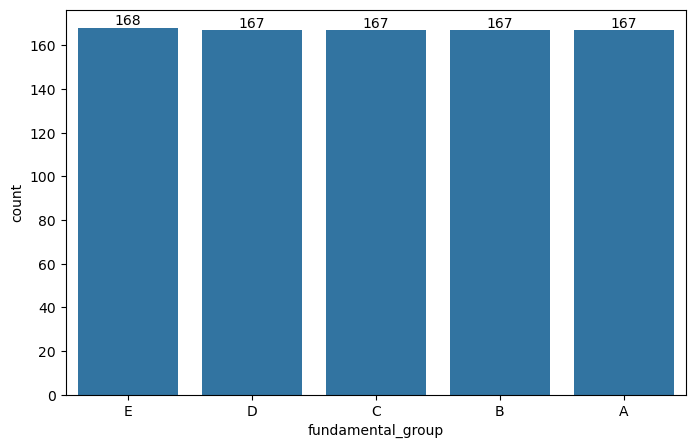

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_fun, x="fundamental_group", order=df_fun["fundamental_group"].value_counts().index)


# ✅ ใส่ตัวเลขบนแท่ง
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10
    )

plt.show()


รวมตาราง โดยsymbol เป็น pimarykey

In [57]:
# ✅ 1) ดึงแท่งล่าสุดของแต่ละ symbol
df_latest_candle = (
    df_result.sort_values("time")
    .groupby("symbol", as_index=False)
    .tail(1)  # หรือใช้ .last() ก็ได้หลัง sort แล้ว
)

# ✅ 2) Merge กับข้อมูล fundamental
df = pd.merge(df_fun, df_latest_candle, on="symbol", how="inner")
df['quadrant'] = df_fun['fundamental_group'].astype(str) + df_result['trend_grade'].astype(str)

In [58]:
df.head()

,symbol,eps,pe,pbv,percentyield,volume,marketcap,score,fundamental_group,time,...,open_price,value,ema5,ema15,ema35,ema89,ema200,rsi,trend_grade,quadrant
0,PPPM,0.02000,0.00,0.70,0.00,263750,105500.001572,-1.556113,D,2025-09-30,...,0.42,0,0.405345,0.413705,0.419833,0.428406,0.434019,40.720717,d,Dc
1,TPCH,0.24112,7.90,0.34,13.91,141400,401575.987864,2.044158,A,2025-09-30,...,2.86,0,2.844297,2.849749,2.849346,2.849244,2.848840,47.825269,c,Ac
2,POLY,0.27632,12.89,2.42,6.38,22400,152320.004272,1.137471,A,2025-09-30,...,6.90,0,6.829600,6.925563,6.948069,6.916856,6.896954,44.452126,c,NaN
3,VCOM,0.21428,7.85,1.48,10.79,104732,303722.809988,1.799435,A,2025-09-30,...,2.92,0,2.899084,2.905416,2.884641,2.827082,2.789608,50.733075,b,Ad
4,NVD,-0.00942,38.87,0.32,0.00,4600,4186.000121,-1.855348,E,2025-09-30,...,0.93,0,0.924915,0.929716,0.935469,0.947964,0.955180,43.396960,d,NaN


In [59]:
df.shape

(799, 23)

In [60]:
df.isnull().sum()

symbol                0
eps                   0
pe                    0
pbv                   0
percentyield          0
volume                0
marketcap             0
score                 0
fundamental_group     0
time                  0
close_price           0
high_price            0
low_price             0
open_price            0
value                 0
ema5                  0
ema15                 0
ema35                 0
ema89                 0
ema200                0
rsi                   0
trend_grade           0
quadrant             60
dtype: int64

In [61]:
def create_quadrant(df, col1="fundamental_group", col2="trend_grade", new_col="quadrant"):
    # normalize ค่าให้ตรง format
    df[col1] = df[col1].astype(str).str.upper()   # A–E
    df[col2] = df[col2].astype(str).str.lower()   # a–e
    
    # รวมกันเป็น quadrant
    df[new_col] = df[col1] + df[col2]
    return df

# ✅ ใช้งาน
df = create_quadrant(df)
print(df[['fundamental_group','trend_grade','quadrant']].head())


  fundamental_group trend_grade quadrant
0                 D           d       Dd
1                 A           c       Ac
2                 A           c       Ac
3                 A           b       Ab
4                 E           d       Ed


In [62]:
df.head()

,symbol,eps,pe,pbv,percentyield,volume,marketcap,score,fundamental_group,time,...,open_price,value,ema5,ema15,ema35,ema89,ema200,rsi,trend_grade,quadrant
0,PPPM,0.02000,0.00,0.70,0.00,263750,105500.001572,-1.556113,D,2025-09-30,...,0.42,0,0.405345,0.413705,0.419833,0.428406,0.434019,40.720717,d,Dd
1,TPCH,0.24112,7.90,0.34,13.91,141400,401575.987864,2.044158,A,2025-09-30,...,2.86,0,2.844297,2.849749,2.849346,2.849244,2.848840,47.825269,c,Ac
2,POLY,0.27632,12.89,2.42,6.38,22400,152320.004272,1.137471,A,2025-09-30,...,6.90,0,6.829600,6.925563,6.948069,6.916856,6.896954,44.452126,c,Ac
3,VCOM,0.21428,7.85,1.48,10.79,104732,303722.809988,1.799435,A,2025-09-30,...,2.92,0,2.899084,2.905416,2.884641,2.827082,2.789608,50.733075,b,Ab
4,NVD,-0.00942,38.87,0.32,0.00,4600,4186.000121,-1.855348,E,2025-09-30,...,0.93,0,0.924915,0.929716,0.935469,0.947964,0.955180,43.396960,d,Ed


In [63]:
df.columns

Index(['symbol', 'eps', 'pe', 'pbv', 'percentyield', 'volume', 'marketcap',
       'score', 'fundamental_group', 'time', 'close_price', 'high_price',
       'low_price', 'open_price', 'value', 'ema5', 'ema15', 'ema35', 'ema89',
       'ema200', 'rsi', 'trend_grade', 'quadrant'],
      dtype='object')

In [64]:
df_model = df.drop(['fundamental_group','trend_grade', 'quadrant'], axis=1)

In [65]:
df_model.to_excel("fileformodel.xlsx", index=False)

ข้อมูลtop10ของSET50

In [66]:
symbols = ["DELTA", "PTT", "AOT", "ADVANC", "KBANK", 
           "TRUE", "GULF", "SCB", "KTC", "KTB", "CPALL"]

df_filtered = df[df['symbol'].isin(symbols)]

df_filtered.head(11)


,symbol,eps,pe,pbv,percentyield,volume,marketcap,score,fundamental_group,time,...,open_price,value,ema5,ema15,ema35,ema89,ema200,rsi,trend_grade,quadrant
67,KBANK,5.67000,8.09,0.68,7.19,7113291,1.191476e+09,7.195536,A,2025-09-30,...,168.00,0,166.488939,166.002595,165.726270,163.890242,162.641398,54.781408,b,Ab
169,CPALL,1.57000,14.91,3.18,3.00,27433089,1.296213e+09,5.795673,A,2025-09-30,...,48.00,0,47.611345,47.609995,47.128683,46.601172,46.377395,49.625573,b,Ab
279,PTT,1.57000,12.86,0.80,6.62,62633553,2.082566e+09,8.273408,A,2025-09-30,...,33.50,0,33.317711,33.029751,32.595977,32.110532,31.859979,56.704477,b,Ab
290,AOT,0.99837,29.10,4.25,2.09,37282120,1.509926e+09,6.561982,A,2025-09-30,...,40.00,0,39.855237,39.237135,38.498190,37.330585,36.597189,61.842397,b,Ab
343,KTC,1.46000,9.46,1.78,4.76,18935378,5.680613e+08,2.933818,A,2025-09-30,...,30.50,0,30.032762,29.761581,29.252493,29.077067,29.182725,56.056035,b,Ab
402,TRUE,0.10607,0.00,5.08,0.00,140305879,1.459181e+09,5.903172,A,2025-09-30,...,10.60,0,10.545747,10.825567,11.016595,11.104259,11.142516,35.539418,d,Ad
582,DELTA,0.81107,100.50,21.75,0.31,36883092,5.845970e+09,30.241061,A,2025-09-30,...,161.50,0,160.588164,159.114201,153.132289,143.294728,137.652982,54.079336,b,Ab
697,SCB,7.51035,9.03,0.90,8.12,8036020,1.032629e+09,7.874111,A,2025-09-30,...,128.00,0,127.749732,127.114766,126.669944,125.287093,124.359820,59.366471,b,Ab
759,KTB,0.84000,7.54,0.74,6.44,109260312,2.709656e+09,10.058986,A,2025-09-30,...,25.25,0,25.017375,25.159347,24.760301,23.956117,23.540038,47.171995,b,Ab
788,ADVANC,7.25000,21.85,8.51,3.65,6902339,2.008581e+09,13.951199,A,2025-09-30,...,294.00,0,291.430875,292.161805,292.544081,291.449350,290.545165,47.447405,c,Ac


In [67]:
# ✅ เตรียมข้อมูล
df["quadrant"] = df["quadrant"].astype(str).str.strip().str.title()
quadrant_groups = df.groupby("quadrant")["symbol"].apply(list).to_dict()

financial_levels = ["A", "B", "C", "D", "E"]
trend_levels = ["a", "b", "c", "d", "e"]

# ✅ สร้าง matrix ที่มี 6 คอลัมน์ (Financial + 5 trend)
table_values = []
fill_colors = []

for f in financial_levels:
    row_vals = [f"<b>{f}</b>"]  # label แถว (A–E)
    row_colors = ["#f2f2f2"]    # สีพื้นของ label
    for t in trend_levels:
        code = f + t
        stocks = quadrant_groups.get(code, [])
        if stocks:
            stock_text = "<br>".join([f"{i+1}. {s}" for i, s in enumerate(stocks)])
            cell_text = f"<b>{code}</b><br>{stock_text}"
        else:
            cell_text = f"<b>{code}</b><br>-"
        row_vals.append(cell_text)
        # สีตาม Financial
        color_map = {"A":"#009900","B":"#66cc33","C":"#ffcc00","D":"#ff9933","E":"#ff3333"}
        row_colors.append(color_map[f])
    table_values.append(row_vals)
    fill_colors.append(row_colors)

# ✅ Transpose ให้ตรงกับรูปแบบ cells.values (ต้อง list ตาม column)
values_T = list(map(list, zip(*table_values)))
colors_T = list(map(list, zip(*fill_colors)))

fig = go.Figure(data=go.Table(
    header=dict(
        values=["<b>Financial ↓ / Trend →</b>"] + [f"<b>{t}</b>" for t in trend_levels],
        fill_color="#dcdcdc",
        align="center",
        font=dict(color="black", size=18)
    ),
    cells=dict(
        values=values_T,
        fill_color=colors_T,
        align="center",
        height=160,
        font=dict(color="black", size=13)
    )
))

# ✅ เพิ่มชื่อกราฟและ Legend
fig.update_layout(
    title=dict(
        text=(
            "<b style='font-size:28px;'>Quadrant stock level</b><br>"
            "<span style='font-size:16px;'>"
            "Financial → A=ยอดเยี่ยม | B=ดี | C=ปานกลาง | D=ไม่ค่อยดี | E=แย่<br>"
            "Trend → a=Super bullish | b=Up trend | c=Side way | d=Down trend | e=Crash"
            "</span>"
        ),
        x=0.5, xanchor="center", yanchor="top"
    ),
    margin=dict(l=20, r=20, t=230, b=20),
    height=1150,
    width=1300,
    paper_bgcolor="white"
)

fig.show()

### 📘 **ชื่อกราฟ:** Quadrant Heatmap

**แกน Y (แนวตั้ง):** Fundamental Group (A–E)

> A = พื้นฐานดีมาก → E = พื้นฐานแย่ที่สุด

**แกน X (แนวนอน):** Trend Grade (a–e)

> a = ขาขึ้นแรง → e = ขาลงแรง

**สี:**

* สีเข้ม (แดง–เลือดหมู) หมายถึง มีจำนวนหุ้นมากใน Quadrant นั้น
* สีอ่อน (เหลือง–ขาว) หมายถึง มีหุ้นน้อยหรือแทบไม่มี

---

### 📊 **สิ่งที่ Heatmap แสดงให้เห็น**

| พื้นฐาน \ แนวโน้ม | a | b      | c  | d  | e |
| ----------------- | - | ------ | -- | -- | - |
| **A**             | 3 | **76** | 45 | 35 | 0 |
| **B**             | 6 | **66** | 54 | 39 | 0 |
| **C**             | 4 | **68** | 50 | 39 | 0 |
| **D**             | 7 | **58** | 48 | 40 | 0 |
| **E**             | 3 | **67** | 50 | 41 | 0 |

---

### 🔍 **วิเคราะห์ความหมาย**

1. **จุดหนาแน่นสูงสุด (สีแดงเข้ม)**

   * อยู่ที่คอลัมน์ **b (trend ขาขึ้น)** ในทุกระดับพื้นฐาน A–E
   * โดยเฉพาะ **A–b (76 หุ้น)** มากที่สุด
     👉 หมายความว่า หุ้นส่วนใหญ่ในตลาดตอนนี้ **มีแนวโน้มขาขึ้นระดับปานกลางถึงดี**

2. **แทบไม่มีหุ้นในแนวโน้ม “e” (ขาลงแรง)**

   * แถวสุดท้ายของทุกกลุ่มเป็น 0
     👉 บ่งบอกว่าตลาดโดยรวมยัง “ไม่เข้าสู่ภาวะขาลงแรง”

3. **กลุ่ม A–b, B–b, C–b, E–b** มีจำนวนสูงใกล้เคียงกัน
   👉 สะท้อนว่าการขึ้นของตลาดเกิดทั่วทั้งกลุ่ม ไม่เฉพาะหุ้นพื้นฐานดี

4. **กลุ่ม A–a มีเพียง 3 หุ้น**
   👉 หุ้นพื้นฐานดีและขาขึ้นแรงจริง ๆ มีน้อยมาก — เป็น “กลุ่มเด่นพิเศษ” หรือ “หุ้นนำตลาด (leaders)”

---

### 🧠 **สรุปภาพรวมตลาดจากกราฟนี้**

* ตลาดส่วนใหญ่ **อยู่ในแนวโน้มขาขึ้นระดับ b และ c**
* **หุ้นพื้นฐานดี (A, B)** ก็ยังคงเป็นขาขึ้น → ภาวะตลาด “เชิงบวก” (bullish sentiment)
* **ไม่มีหุ้นใน e (ขาลงแรง)** → ความเสี่ยงตลาดโดยรวมต่ำ
* สามารถสรุปได้ว่า

  > “Most stocks are in a mild-to-strong uptrend, with concentration in Quadrants Ab–Cb, indicating a stable bullish phase.”

---

In [68]:
import plotly.express as px
df_result3 = df.copy()
quadrant_counts = df_result3['quadrant'].value_counts().sort_index()
financial_levels = ["A","B","C","D","E"]   # กลุ่มพื้นฐาน (Fundamental)
trend_levels = ["a","b","c","d","e"]       # กลุ่มเทคนิค (Trend)

heatmap_data = pd.DataFrame(0, index=financial_levels, columns=trend_levels)
for q, count in quadrant_counts.items():
    fin = q[0]   # เช่น "A"
    trend = q[1] # เช่น "a"
    heatmap_data.loc[fin, trend] = count
fig = px.imshow(
    heatmap_data,
    labels=dict(x="Trend (a–e)", y="Fundamental Group (A–E)", color="Stock Count"),
    x=trend_levels,
    y=financial_levels,
    color_continuous_scale="YlOrRd",
    text_auto=True
)
fig.update_layout(title="📊 Quadrant Heatmap")

Modelling

Model defult vs Grid search Model

🔁 Default Run 1/5


e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

e:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
🔁 Default Run 2/5


e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

e:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
🔁 Default Run 3/5


e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

e:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
🔁 Default Run 4/5


e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

e:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
🔁 Default Run 5/5


e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

e:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


e:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

e:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

e:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.

e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

e:\Anaconda\Lib\site-packages\sklearn\


✅ MODEL PERFORMANCE COMPARISON (Default avg 5 runs vs Grid Search)


,Model,Accuracy_Default,Accuracy_Grid,F1_Default,F1_Grid,Improvement_Acc_%,Improvement_F1_%
0,K-Means,0.031539,0.012516,0.021445,0.014800,-1.902378,-0.664465
1,Decision Tree,0.448750,0.516425,0.440264,0.421664,6.767470,-1.859970
2,KNN,0.468750,0.532087,0.449953,0.443326,6.333661,-0.662664
3,ANN (Sklearn),0.595000,0.668172,0.577854,0.626707,7.317175,4.885255
4,Deep Learning (Keras),0.572500,0.627543,0.533496,0.609281,5.504303,7.578426


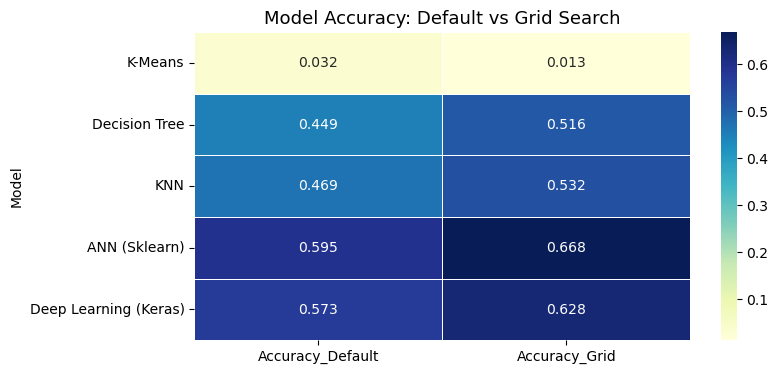

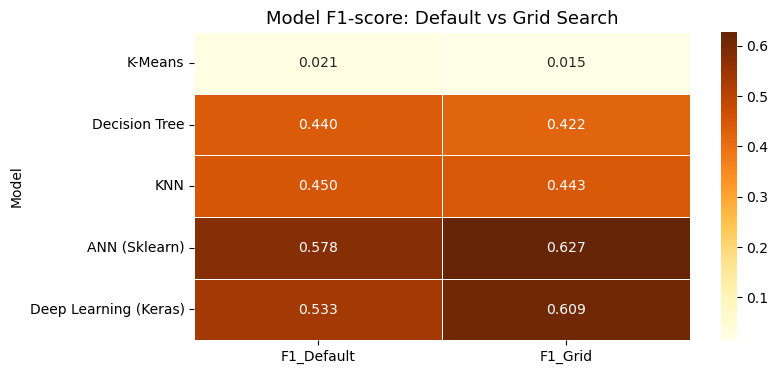

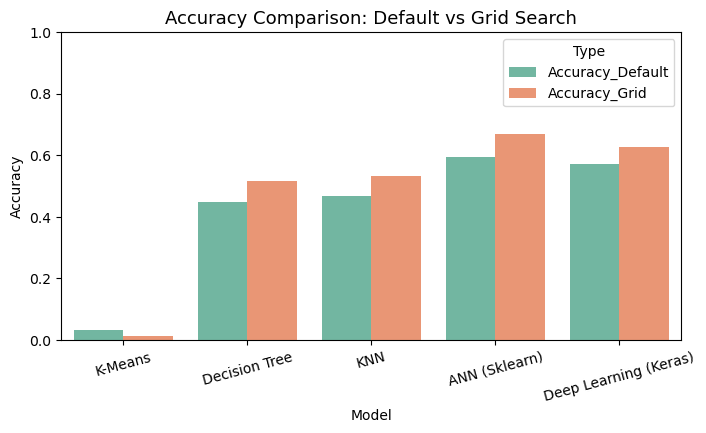

In [69]:
# ============================================================
# 🔰 STOCK QUADRANT MODEL COMPARISON (Default vs Grid Search)
# ============================================================

import os, random
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# 1️⃣ SET RANDOM SEED
# ============================================================
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ============================================================
# 2️⃣ LOAD DATA
# ============================================================
df = pd.read_excel("stock_all_data.xlsx")

features = [
    "eps", "pe", "pbv", "percentyield", "marketcap",
    "close_price", "high_price", "low_price", "open_price",
    "value", "ema5", "ema15", "ema35", "ema89", "ema200", "rsi"
]

X = df[features].fillna(0)
y = df["quadrant"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=SEED
)

# ============================================================
# 3️⃣ DEFAULT MODELS (Run 5 times average)
# ============================================================
N_RUNS = 5
acc_default, f1_default = {"K-Means": [], "Decision Tree": [], "KNN": [], "ANN": [], "Deep": []}, \
                          {"K-Means": [], "Decision Tree": [], "KNN": [], "ANN": [], "Deep": []}

for i in range(N_RUNS):
    print(f"🔁 Default Run {i+1}/{N_RUNS}")

    # --- K-Means ---
    kmeans = KMeans(n_clusters=len(np.unique(y_encoded)), random_state=SEED + i)
    kmeans.fit(X_scaled)
    acc_default["K-Means"].append(accuracy_score(y_encoded, kmeans.labels_))
    f1_default["K-Means"].append(f1_score(y_encoded, kmeans.labels_, average='weighted'))

    # --- Decision Tree ---
    tree = DecisionTreeClassifier(random_state=SEED + i)
    tree.fit(X_train, y_train)
    y_pred_tree = tree.predict(X_test)
    acc_default["Decision Tree"].append(accuracy_score(y_test, y_pred_tree))
    f1_default["Decision Tree"].append(f1_score(y_test, y_pred_tree, average='weighted'))

    # --- KNN ---
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc_default["KNN"].append(accuracy_score(y_test, y_pred_knn))
    f1_default["KNN"].append(f1_score(y_test, y_pred_knn, average='weighted'))

    # --- ANN (Sklearn) ---
    ann = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=SEED + i)
    ann.fit(X_train, y_train)
    y_pred_ann = ann.predict(X_test)
    acc_default["ANN"].append(accuracy_score(y_test, y_pred_ann))
    f1_default["ANN"].append(f1_score(y_test, y_pred_ann, average='weighted'))

    # --- Deep Learning (Keras) ---
    num_classes = len(np.unique(y_encoded))
    dl = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    dl.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    dl.fit(X_train, y_train, epochs=30, batch_size=16, verbose=0)
    loss, acc = dl.evaluate(X_test, y_test, verbose=0)
    y_pred_dl = np.argmax(dl.predict(X_test), axis=1)
    acc_default["Deep"].append(acc)
    f1_default["Deep"].append(f1_score(y_test, y_pred_dl, average='weighted'))

# ============================================================
# 4️⃣ GRID SEARCH MODELS
# ============================================================

# --- Decision Tree ---
param_tree = {"max_depth": [3, 5, 7, 9, None], "criterion": ["gini", "entropy"]}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=SEED), param_tree, cv=5, n_jobs=-1)
grid_tree.fit(X_train, y_train)
acc_tree_g = grid_tree.best_score_
y_pred_tree_g = grid_tree.best_estimator_.predict(X_test)
f1_tree_g = f1_score(y_test, y_pred_tree_g, average='weighted')

# --- KNN ---
param_knn = {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5, n_jobs=-1)
grid_knn.fit(X_train, y_train)
acc_knn_g = grid_knn.best_score_
y_pred_knn_g = grid_knn.best_estimator_.predict(X_test)
f1_knn_g = f1_score(y_test, y_pred_knn_g, average='weighted')

# --- ANN (Sklearn) ---
param_ann = {"hidden_layer_sizes": [(64,), (128, 64), (128, 64, 32)], "activation": ["relu", "tanh"]}
grid_ann = GridSearchCV(MLPClassifier(max_iter=300, random_state=SEED), param_ann, cv=5, n_jobs=-1)
grid_ann.fit(X_train, y_train)
acc_ann_g = grid_ann.best_score_
y_pred_ann_g = grid_ann.best_estimator_.predict(X_test)
f1_ann_g = f1_score(y_test, y_pred_ann_g, average='weighted')

# --- K-Means ---
param_kmeans = {"n_clusters": [20, 25, 30]}
grid_kmeans = GridSearchCV(KMeans(random_state=SEED), param_kmeans, cv=[(slice(None), slice(None))])
grid_kmeans.fit(X_scaled, y_encoded)
acc_kmeans_g = accuracy_score(y_encoded, grid_kmeans.best_estimator_.fit_predict(X_scaled))
f1_kmeans_g = f1_score(y_encoded, grid_kmeans.best_estimator_.fit_predict(X_scaled), average='weighted')

# --- Deep Learning (Keras/scikeras) ---
def build_model(units=128, dropout=0.3):
    model = Sequential([
        Dense(units, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout),
        Dense(64, activation='relu'),
        Dense(len(np.unique(y_encoded)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

keras_model = KerasClassifier(model=build_model, verbose=0)
param_dl = {
    "model__units": [64, 128],
    "model__dropout": [0.2, 0.3],
    "epochs": [30, 50],
    "batch_size": [16, 32]
}
grid_dl = GridSearchCV(keras_model, param_dl, cv=3)
grid_dl.fit(X_train, y_train)
acc_dl_g = grid_dl.best_score_
y_pred_dl_g = grid_dl.best_estimator_.predict(X_test)
f1_dl_g = f1_score(y_test, y_pred_dl_g, average='weighted')

# ============================================================
# 5️⃣ SUMMARY TABLE
# ============================================================
compare_df = pd.DataFrame({
    "Model": ["K-Means", "Decision Tree", "KNN", "ANN (Sklearn)", "Deep Learning (Keras)"],
    "Accuracy_Default": [np.mean(acc_default["K-Means"]),
                         np.mean(acc_default["Decision Tree"]),
                         np.mean(acc_default["KNN"]),
                         np.mean(acc_default["ANN"]),
                         np.mean(acc_default["Deep"])],
    "Accuracy_Grid": [acc_kmeans_g, acc_tree_g, acc_knn_g, acc_ann_g, acc_dl_g],
    "F1_Default": [np.mean(f1_default["K-Means"]),
                   np.mean(f1_default["Decision Tree"]),
                   np.mean(f1_default["KNN"]),
                   np.mean(f1_default["ANN"]),
                   np.mean(f1_default["Deep"])],
    "F1_Grid": [f1_kmeans_g, f1_tree_g, f1_knn_g, f1_ann_g, f1_dl_g]
})

compare_df["Improvement_Acc_%"] = (compare_df["Accuracy_Grid"] - compare_df["Accuracy_Default"]) * 100
compare_df["Improvement_F1_%"] = (compare_df["F1_Grid"] - compare_df["F1_Default"]) * 100

print("\n✅ MODEL PERFORMANCE COMPARISON (Default avg 5 runs vs Grid Search)")
display(compare_df)

# ============================================================
# 6️⃣ HEATMAP + BAR CHART
# ============================================================
plt.figure(figsize=(8, 4))
sns.heatmap(compare_df.set_index("Model")[["Accuracy_Default", "Accuracy_Grid"]],
            annot=True, cmap="YlGnBu", fmt=".3f", linewidths=0.5)
plt.title("Model Accuracy: Default vs Grid Search", fontsize=13)
plt.show()

plt.figure(figsize=(8, 4))
sns.heatmap(compare_df.set_index("Model")[["F1_Default", "F1_Grid"]],
            annot=True, cmap="YlOrBr", fmt=".3f", linewidths=0.5)
plt.title("Model F1-score: Default vs Grid Search", fontsize=13)
plt.show()

df_melt = compare_df.melt(id_vars="Model",
                          value_vars=["Accuracy_Default", "Accuracy_Grid"],
                          var_name="Type", value_name="Accuracy")
plt.figure(figsize=(8, 4))
sns.barplot(data=df_melt, x="Model", y="Accuracy", hue="Type", palette="Set2")
plt.title("Accuracy Comparison: Default vs Grid Search", fontsize=13)
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.show()


e:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128304 (\N{JAPANESE SYMBOL FOR BEGINNER}) missing from font(s) DejaVu Sans.



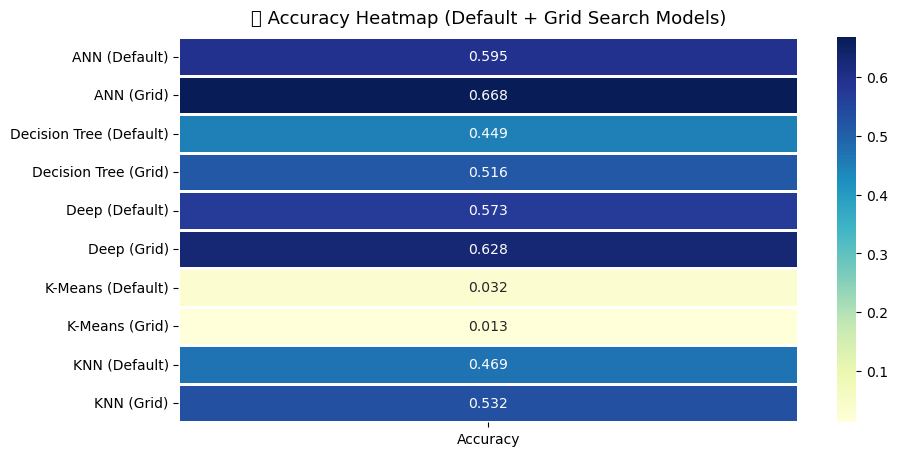

e:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



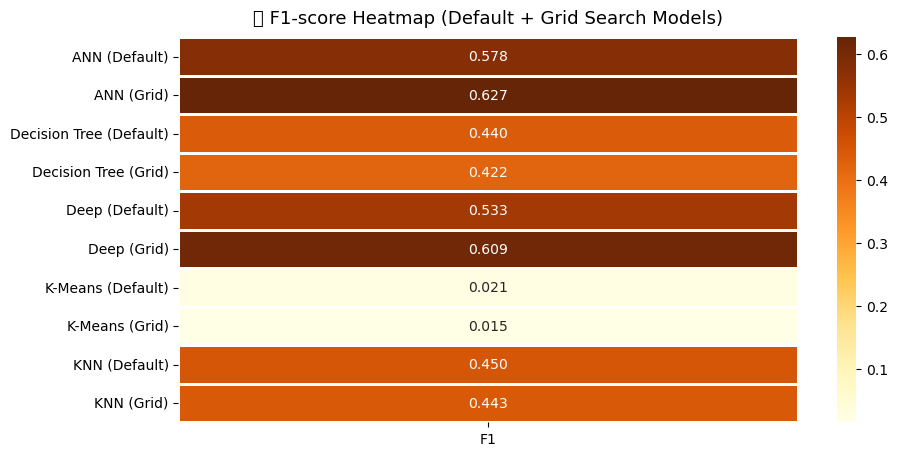

In [70]:
# ============================================================
# 🔰 HEATMAP: 10 MODELS (Default + Grid Search)
# ============================================================

# ✅ สร้าง DataFrame ใหม่รวม 10 โมเดล
heatmap_df = pd.DataFrame({
    "Model": [
        "K-Means (Default)", "Decision Tree (Default)", "KNN (Default)", "ANN (Default)", "Deep (Default)",
        "K-Means (Grid)", "Decision Tree (Grid)", "KNN (Grid)", "ANN (Grid)", "Deep (Grid)"
    ],
    "Accuracy": [
        compare_df.loc[0, "Accuracy_Default"],
        compare_df.loc[1, "Accuracy_Default"],
        compare_df.loc[2, "Accuracy_Default"],
        compare_df.loc[3, "Accuracy_Default"],
        compare_df.loc[4, "Accuracy_Default"],
        compare_df.loc[0, "Accuracy_Grid"],
        compare_df.loc[1, "Accuracy_Grid"],
        compare_df.loc[2, "Accuracy_Grid"],
        compare_df.loc[3, "Accuracy_Grid"],
        compare_df.loc[4, "Accuracy_Grid"],
    ],
    "F1": [
        compare_df.loc[0, "F1_Default"],
        compare_df.loc[1, "F1_Default"],
        compare_df.loc[2, "F1_Default"],
        compare_df.loc[3, "F1_Default"],
        compare_df.loc[4, "F1_Default"],
        compare_df.loc[0, "F1_Grid"],
        compare_df.loc[1, "F1_Grid"],
        compare_df.loc[2, "F1_Grid"],
        compare_df.loc[3, "F1_Grid"],
        compare_df.loc[4, "F1_Grid"],
    ]
})

# ------------------------------------------------------------
# 🔹 Heatmap Accuracy
# ------------------------------------------------------------
plt.figure(figsize=(10, 5))
sns.heatmap(
    heatmap_df.pivot_table(values="Accuracy", index="Model"),
    annot=True, cmap="YlGnBu", fmt=".3f", linewidths=0.8, cbar=True
)
plt.title("🔰 Accuracy Heatmap (Default + Grid Search Models)", fontsize=13, pad=10)
plt.xlabel("")
plt.ylabel("")
plt.yticks(rotation=0)
plt.show()

# ------------------------------------------------------------
# 🔹 Heatmap F1-score
# ------------------------------------------------------------
plt.figure(figsize=(10, 5))
sns.heatmap(
    heatmap_df.pivot_table(values="F1", index="Model"),
    annot=True, cmap="YlOrBr", fmt=".3f", linewidths=0.8, cbar=True
)
plt.title("🔥 F1-score Heatmap (Default + Grid Search Models)", fontsize=13, pad=10)
plt.xlabel("")
plt.ylabel("")
plt.yticks(rotation=0)
plt.show()


e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

e:\Anaconda\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 128304 (\N{JAPANESE SYMBOL FOR BEGINNER}) missing from font(s) DejaVu Sans.

e:\Anaconda\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 128304 (\N{JAPANESE SYMBOL FOR BEGINNER}) missing from font(s) DejaVu Sans.

e:\Anaconda\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 128304 (\N{JAPANESE SYMBOL FOR BEGINNER}) missing from font(s) DejaVu Sans.

e:\Anaconda\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 128304 (\N{JAPANESE SYMBOL FOR BEGINNER}) missing from font(s) DejaVu Sans.

e:\Anaconda\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 128304 (\N{JAPANESE SYMBOL FOR BEGINNER}) missing from font(s) DejaVu Sans.



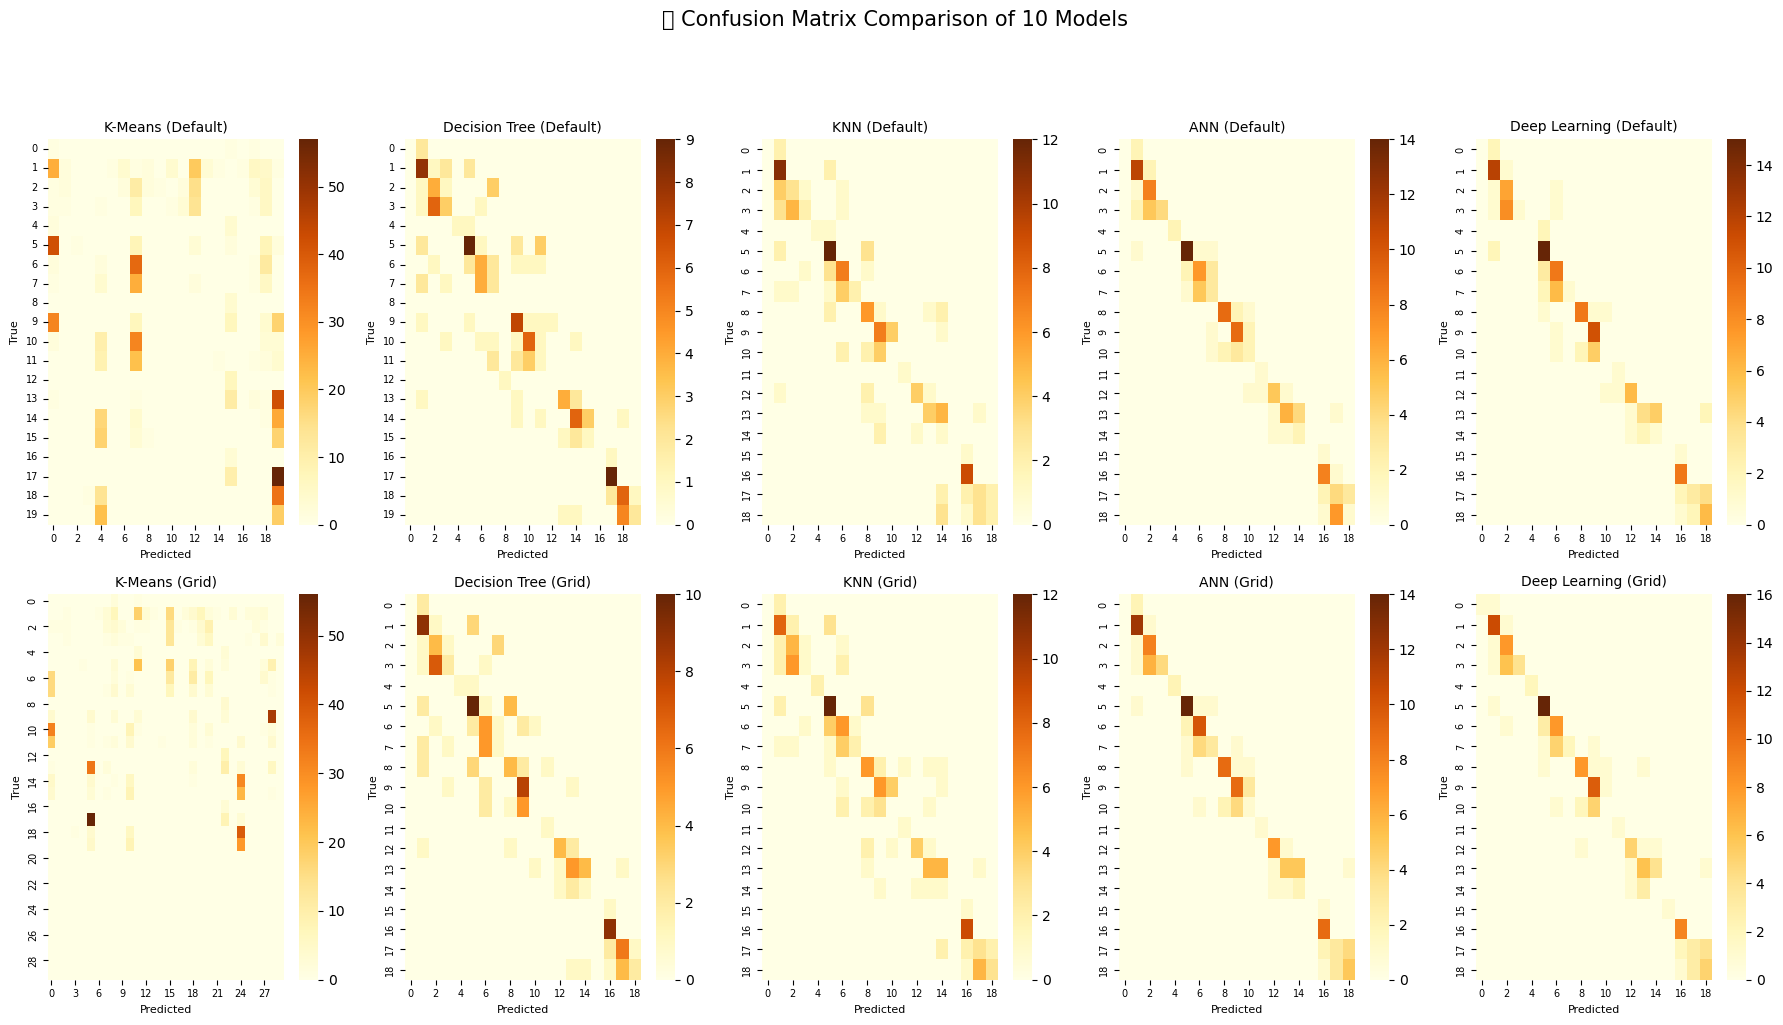

In [71]:
# ============================================================
# 🔰 CONFUSION MATRIX COMPARISON — 10 MODELS (Default + Grid)
# ============================================================

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ สร้าง dict รวมทั้ง 10 โมเดล
predictions_all = {
    # --- Default Models ---
    "K-Means (Default)": kmeans.labels_,
    "Decision Tree (Default)": y_pred_tree,
    "KNN (Default)": y_pred_knn,
    "ANN (Default)": y_pred_ann,
    "Deep Learning (Default)": y_pred_dl,

    # --- Grid Search Models ---
    "K-Means (Grid)": grid_kmeans.best_estimator_.fit_predict(X_scaled),
    "Decision Tree (Grid)": grid_tree.best_estimator_.predict(X_test),
    "KNN (Grid)": grid_knn.best_estimator_.predict(X_test),
    "ANN (Grid)": grid_ann.best_estimator_.predict(X_test),
    "Deep Learning (Grid)": grid_dl.best_estimator_.predict(X_test)
}

# ============================================================
# 🧩 Plot Confusion Matrix Grid
# ============================================================
plt.figure(figsize=(18, 10))
plt.suptitle("🔰 Confusion Matrix Comparison of 10 Models", fontsize=15, y=1.02)

for i, (model_name, y_pred) in enumerate(predictions_all.items()):
    plt.subplot(2, 5, i + 1)

    # ✅ แยกชุดที่ใช้ (K-Means ใช้ทั้ง dataset)
    if "K-Means" in model_name:
        cm = confusion_matrix(y_encoded, y_pred)
    else:
        cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, cmap="YlOrBr", cbar=True)
    plt.title(model_name, fontsize=10)
    plt.xlabel("Predicted", fontsize=8)
    plt.ylabel("True", fontsize=8)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [72]:
# ============================================================
# 4.5️⃣ SHOW BEST PARAMETERS (From GridSearchCV)
# ============================================================

best_params = [
    grid_kmeans.best_params_,
    grid_tree.best_params_,
    grid_knn.best_params_,
    grid_ann.best_params_,
    grid_dl.best_params_
]

model_names = ["K-Means", "Decision Tree", "KNN", "ANN (Sklearn)", "Deep Learning (Keras)"]

df_best_params = pd.DataFrame({
    "Model": model_names,
    "Best Parameters": best_params
})

# ✅ แสดงแบบ Pandas Style เหมือนภาพ
styled_params = (
    df_best_params.style
    .set_caption("Best Parameters")
    .set_properties(**{
        "background-color": "#E8DAEF",
        "color": "black",
        "font-family": "monospace",
        "text-align": "left"
    })
    .hide(axis="index")
)

display(styled_params)


Model,Best Parameters
K-Means,{'n_clusters': 30}
Decision Tree,"{'criterion': 'gini', 'max_depth': 7}"
KNN,"{'n_neighbors': 5, 'weights': 'distance'}"
ANN (Sklearn),"{'activation': 'tanh', 'hidden_layer_sizes': (128, 64)}"
Deep Learning (Keras),"{'batch_size': 16, 'epochs': 50, 'model__dropout': 0.3, 'model__units': 128}"


In [73]:
# ============================================================
# 7️⃣ SEPARATE METRICS (Accuracy & F1 Only) — Default vs Grid
# ============================================================
from sklearn.metrics import accuracy_score, f1_score

# -------- Helper function --------
def evaluate_model_short(name, y_true, y_pred):
    """Return only Accuracy and F1 (Macro & Weighted)"""
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1-score (Macro)": f1_score(y_true, y_pred, average='macro', zero_division=0),
        "F1-score (Weighted)": f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

# -------- Evaluate Default Models --------
metrics_default = []
metrics_default.append(evaluate_model_short("K-Means", y_encoded, kmeans.labels_))
metrics_default.append(evaluate_model_short("Decision Tree", y_test, y_pred_tree))
metrics_default.append(evaluate_model_short("KNN", y_test, y_pred_knn))
metrics_default.append(evaluate_model_short("ANN (Sklearn)", y_test, y_pred_ann))
metrics_default.append(evaluate_model_short("Deep Learning (Keras)", y_test, y_pred_dl))

metrics_default_df = pd.DataFrame(metrics_default).round(4)
print("\n📊 DEFAULT MODELS — Accuracy & F1:")
display(metrics_default_df)

# -------- Evaluate Grid Search Models --------
y_preds_grid = {
    "K-Means": grid_kmeans.best_estimator_.fit_predict(X_scaled),
    "Decision Tree": y_pred_tree_g,
    "KNN": y_pred_knn_g,
    "ANN (Sklearn)": y_pred_ann_g,
    "Deep Learning (Keras)": y_pred_dl_g
}

metrics_grid = []
for model_name, y_pred in y_preds_grid.items():
    y_true = y_encoded if model_name == "K-Means" else y_test
    metrics_grid.append(evaluate_model_short(model_name, y_true, y_pred))

metrics_grid_df = pd.DataFrame(metrics_grid).round(4)
print("\n📊 GRID SEARCH MODELS — Accuracy & F1:")
display(metrics_grid_df)

# ============================================================
# 8️⃣ COMBINE SUMMARY (Default vs Grid)
# ============================================================
metrics_combined = pd.merge(
    metrics_default_df, metrics_grid_df,
    on="Model", suffixes=("_Default", "_Grid")
)

print("\n✅ COMPARISON SUMMARY (Accuracy & F1 Only)")
display(metrics_combined)



📊 DEFAULT MODELS — Accuracy & F1:


,Model,Accuracy,F1-score (Macro),F1-score (Weighted)
0,K-Means,0.0588,0.0232,0.0245
1,Decision Tree,0.4562,0.3624,0.4468
2,KNN,0.4688,0.4216,0.4500
3,ANN (Sklearn),0.6000,0.5276,0.5839
4,Deep Learning (Keras),0.5938,0.4448,0.5382



📊 GRID SEARCH MODELS — Accuracy & F1:


e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



,Model,Accuracy,F1-score (Macro),F1-score (Weighted)
0,K-Means,0.0125,0.0083,0.0148
1,Decision Tree,0.4500,0.3906,0.4217
2,KNN,0.4625,0.4183,0.4433
3,ANN (Sklearn),0.6500,0.5809,0.6267
4,Deep Learning (Keras),0.6375,0.6258,0.6093



✅ COMPARISON SUMMARY (Accuracy & F1 Only)


,Model,Accuracy_Default,F1-score (Macro)_Default,F1-score (Weighted)_Default,Accuracy_Grid,F1-score (Macro)_Grid,F1-score (Weighted)_Grid
0,K-Means,0.0588,0.0232,0.0245,0.0125,0.0083,0.0148
1,Decision Tree,0.4562,0.3624,0.4468,0.4500,0.3906,0.4217
2,KNN,0.4688,0.4216,0.4500,0.4625,0.4183,0.4433
3,ANN (Sklearn),0.6000,0.5276,0.5839,0.6500,0.5809,0.6267
4,Deep Learning (Keras),0.5938,0.4448,0.5382,0.6375,0.6258,0.6093


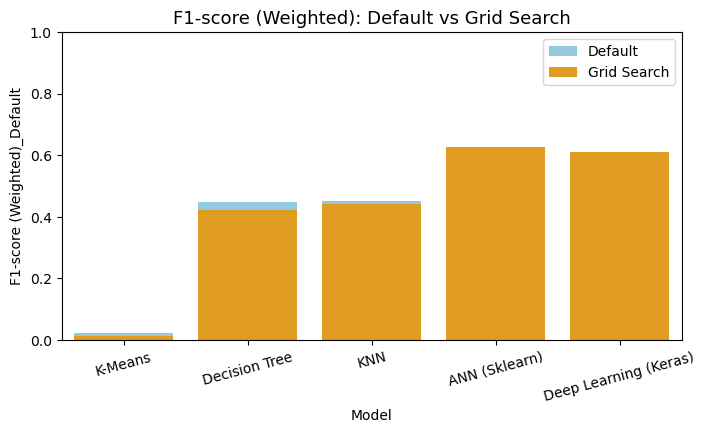

In [74]:
# ============================================================
# 📈 FIXED: PLOT F1 (Weighted)
# ============================================================
plt.figure(figsize=(8, 4))
sns.barplot(data=metrics_combined, x="Model", y="F1-score (Weighted)_Default", color="skyblue", label="Default")
sns.barplot(data=metrics_combined, x="Model", y="F1-score (Weighted)_Grid", color="orange", label="Grid Search")

plt.title("F1-score (Weighted): Default vs Grid Search", fontsize=13)
plt.ylim(0, 1)
plt.legend()
plt.xticks(rotation=15)
plt.show()


Deployment

In [75]:
# ============================================================
# 🔍 FIND BEST MODEL (From Grid + Default)
# ============================================================

# รวมค่า Accuracy ทั้ง Default และ Grid
compare_df["Best_Accuracy"] = compare_df[["Accuracy_Default", "Accuracy_Grid"]].max(axis=1)

# หาชื่อโมเดลที่ดีที่สุด
best_row = compare_df.loc[compare_df["Best_Accuracy"].idxmax()]
best_model_name = best_row["Model"]
best_score = best_row["Best_Accuracy"]

print(f"🏆 Best Model: {best_model_name} (Accuracy: {best_score:.3f})")


🏆 Best Model: ANN (Sklearn) (Accuracy: 0.668)


In [76]:
# ============================================================
# 🔰 SELECT MODEL OBJECT BY NAME
# ============================================================

# dictionary รวมโมเดลที่เทรนแล้ว
model_dict = {
    "K-Means": grid_kmeans.best_estimator_,
    "Decision Tree": grid_tree.best_estimator_,
    "KNN": grid_knn.best_estimator_,
    "ANN (Sklearn)": grid_ann.best_estimator_,
    "Deep Learning (Keras)": grid_dl.best_estimator_.model_,
}

# ดึงโมเดลที่ดีที่สุดออกมา
best_model = model_dict[best_model_name]


In [77]:
import os, joblib
from tensorflow.keras.models import save_model

os.makedirs("deploy_model", exist_ok=True)

# บันทึก Scaler และ Label Encoder
joblib.dump(scaler, "deploy_model/scaler.pkl")
joblib.dump(le, "deploy_model/label_encoder.pkl")

# ------------------------------------------------------------
# 🔹 ถ้าเป็นโมเดล Keras (.h5)
# ------------------------------------------------------------
if best_model_name == "Deep Learning (Keras)":
    best_model.save("deploy_model/best_model_deep.h5")
else:
    joblib.dump(best_model, f"deploy_model/best_model.pkl")

print(f"✅ Best model '{best_model_name}' saved for deployment successfully!")


✅ Best model 'ANN (Sklearn)' saved for deployment successfully!


In [78]:
# ============================================================
# 💾 SAVE DEEP LEARNING MODEL + SCALER + LABEL ENCODER
# ============================================================
import os, joblib
from tensorflow.keras.models import save_model

# 🔹 สร้างโฟลเดอร์สำหรับบันทึกโมเดล
os.makedirs("deploy_model_deep", exist_ok=True)

# 🔹 บันทึก Scaler และ Label Encoder
joblib.dump(scaler, "deploy_model_deep/scaler.pkl")
joblib.dump(le, "deploy_model_deep/label_encoder.pkl")

# 🔹 ดึงโมเดล Deep Learning ที่ผ่านการ Grid Search มาแล้ว
best_dl_model = grid_dl.best_estimator_.model_

# 🔹 บันทึกโมเดลเป็นไฟล์ .h5
best_dl_model.save("deploy_model_deep/best_model_deep.h5")

print("✅ Deep Learning model and preprocessing files saved successfully!")


✅ Deep Learning model and preprocessing files saved successfully!
